# Titanic: Machine Learning from Disaster

* Description:
    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
* Problem definition: In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

## Data Exploration

In [126]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
print "Dimension of train data {}".format(train.shape)
print "Dimension of test data {}".format(test.shape)

Dimension of train data (891, 12)
Dimension of test data (418, 11)


In [45]:
print "Basic statistical description:"
train.describe()

Basic statistical description:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From following cells, we could know that train and test data are split by passenger-id. And values of survived are our target.

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We could know that train data is close to balanced.

In [4]:
print train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64


From both histograms, we could see that the shapes of histogram in both groups are very similar, it may infer that age is not very important factor to tell if one person would survive.

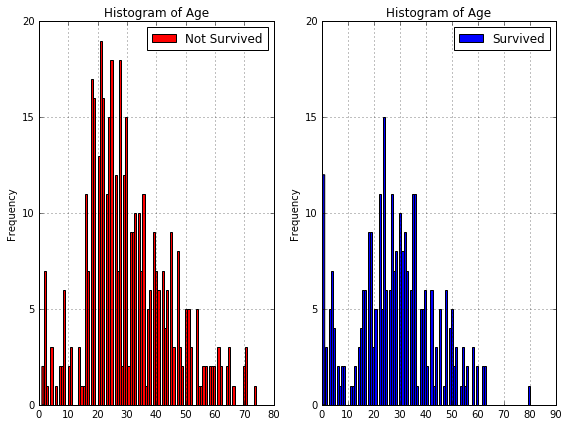

In [5]:
fg, ax = plt.subplots(ncols=2)
ax[0].set_ylim((0,20))
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Age')
train[train.Survived==0].Age.hist(bins=100, label="Not Survived", color="red", ax=ax[0])
ax[0].legend()

ax[1].set_ylim((0,20))
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Age')
train[train.Survived==1].Age.hist(bins=100, label="Survived", color="blue", ax=ax[1])
ax[1].legend()
fg.tight_layout()

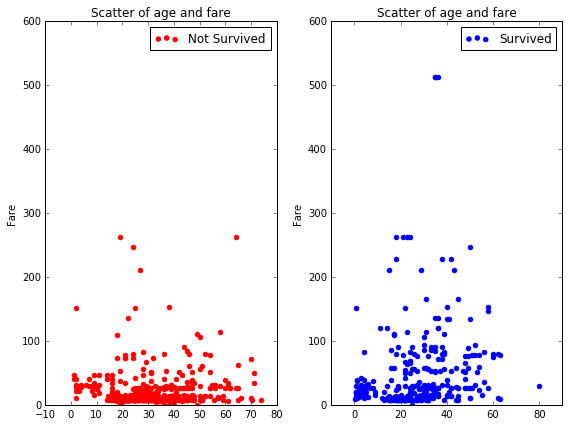

In [6]:
fg, ax = plt.subplots(ncols=2)
ax[0].set_ylim((0,600))
ax[0].set_ylabel('Fare')
ax[0].set_title('Scatter of age and fare')
ax[0].scatter(train[train.Survived==0].Age, train[train.Survived==0].Fare, label="Not Survived", color="red")
ax[0].legend()

ax[1].set_ylim((0,600))
ax[1].set_ylabel('Fare')
ax[1].set_title('Scatter of age and fare')
ax[1].scatter(train[train.Survived==1].Age, train[train.Survived==1].Fare, label="Survived", color="blue")
ax[1].legend()
fg.tight_layout()

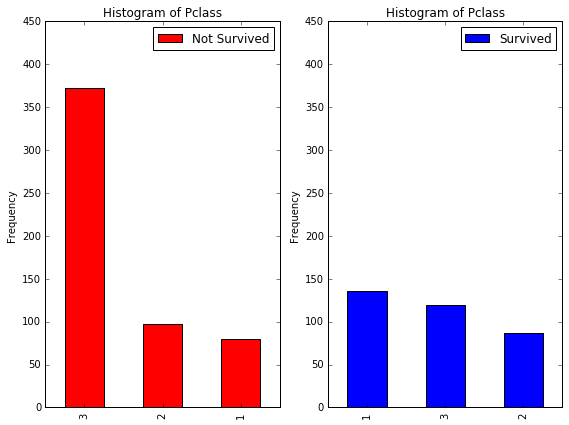

In [7]:
fg, ax = plt.subplots(ncols=2)
ax[0].set_ylim((0,450))
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Pclass')
train[train.Survived==0].Pclass.value_counts().plot(kind='bar', label="Not Survived", color="red", ax=ax[0])
ax[0].legend()

ax[1].set_ylim((0,450))
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Pclass')
train[train.Survived==1].Pclass.value_counts().plot(kind='bar', label="Survived", color="blue", ax=ax[1])
ax[1].legend()
fg.tight_layout()

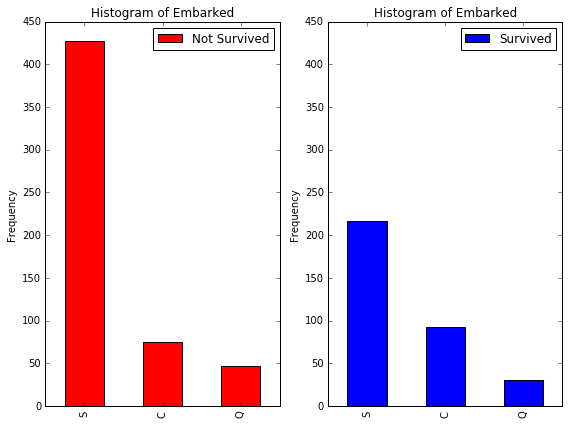

In [8]:
fg, ax = plt.subplots(ncols=2)
ax[0].set_ylim((0,450))
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Embarked')
train[train.Survived==0].Embarked.value_counts().plot(kind='bar', label="Not Survived", color="red", ax=ax[0])
ax[0].legend()

ax[1].set_ylim((0,450))
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Embarked')
train[train.Survived==1].Embarked.value_counts().plot(kind='bar', label="Survived", color="blue", ax=ax[1])
ax[1].legend()
fg.tight_layout()

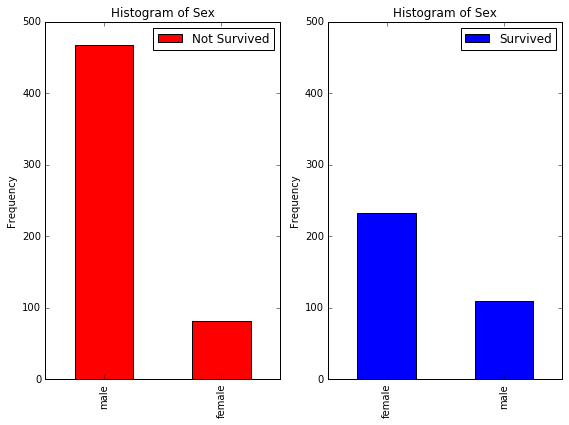

In [9]:
fg, ax = plt.subplots(ncols=2)
ax[0].set_ylim((0,500))
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Sex')
train[train.Survived==0].Sex.value_counts().plot(kind='bar', label="Not Survived", color="red", ax=ax[0])
ax[0].legend()

ax[1].set_ylim((0,500))
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Sex')
train[train.Survived==1].Sex.value_counts().plot(kind='bar', label="Survived", color="blue", ax=ax[1])
ax[1].legend()
fg.tight_layout()

## Data Cleaning

Thanks for [this amazing sharing](https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic/notebook), now we have a good way to replace missing values with sensible values. Let's assume the embarked is related with fare and pclass.

### Missing values on Embarked

,Fare,Pclass,Embarked
61,80,1,NaN
829,80,1,NaN


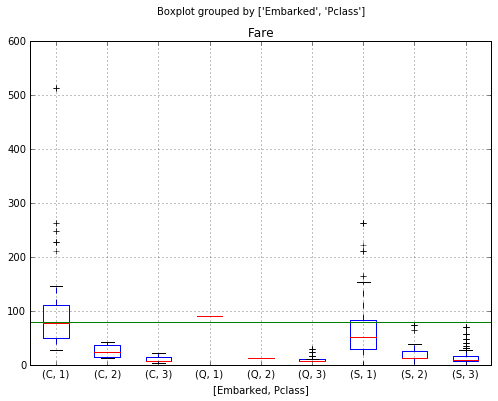

In [105]:
train.boxplot(column='Fare', by=['Embarked','Pclass'])
plt.axhline(y=80, color='green')

train[train.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]

From the above boxplot, we should replace NA with C because most people who had Pclass 1 and Fare 80 would be Embarked C

In [127]:
_ = train.set_value(train.Embarked.isnull(), 'Embarked', 'C')

### Missing values on Fare

By fixing the values of Embarked and Pclass, we could plot histogram of Fare. And we should use the most common value to replace the NA value of Fare.

,Pclass,Fare,Embarked
152,3,NaN,S


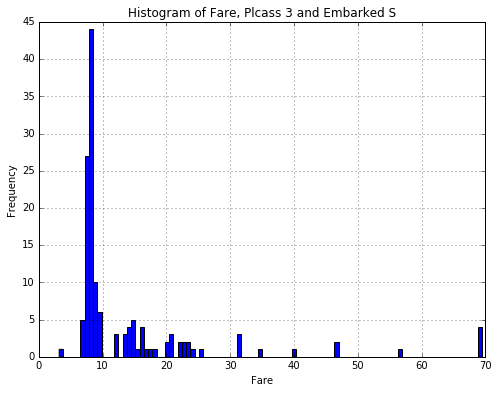

In [13]:
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.hist(bins=100)
test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare, Plcass 3 and Embarked S')

test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]

In [5]:
print "The top 5 most common value of Fare"
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.value_counts().head()

The top 5 most common value of Fare


8.0500    17
7.7750    10
7.8958    10
7.8542     8
8.6625     8
Name: Fare, dtype: int64

In [128]:
_ = test.set_value(test.Fare.isnull(), 'Fare', 8.05)

### Missing values on Age

There are higher percentage of missing values on Age than other features, which is 263/1309 ~= 20%

In [129]:
full = pd.concat([train, test], ignore_index=True)

In [17]:
full[full.Age.isnull()].shape

(263, 12)

In [130]:
full = full[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']]

In [131]:
full = pd.get_dummies(full, columns=['Embarked', 'Sex'])

In [20]:
full.head()

,Pclass,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,1,0,7.2500,22,0,0,1,0,1
1,1,1,0,71.2833,38,1,0,0,1,0
2,3,0,0,7.9250,26,0,0,1,1,0
3,1,1,0,53.1000,35,0,0,1,1,0
4,3,0,0,8.0500,35,0,0,1,0,1


Shuffles and splits data into training and testing subsets.

In [132]:
from sklearn.cross_validation import train_test_split
X = full[~full.Age.isnull()].drop('Age', axis=1)
y = full[~full.Age.isnull()].Age
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Using random forest to predict the age for replacing the missing values

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn import grid_search

rf = RandomForestRegressor(random_state=42)
parameters = {'max_depth': [1,3,5], 'min_samples_leaf':[1,3,5]}
scoring_function = make_scorer(mean_absolute_error, greater_is_better=False)

reg = grid_search.GridSearchCV(rf, param_grid=parameters, scoring=scoring_function)
reg.fit(X_train, y_train)
print reg.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [113]:
print "Mean absolute error of test data: {}".format(mean_absolute_error(y_test, reg.predict(X_test)))

Mean absolute error of test data: 8.80282579661


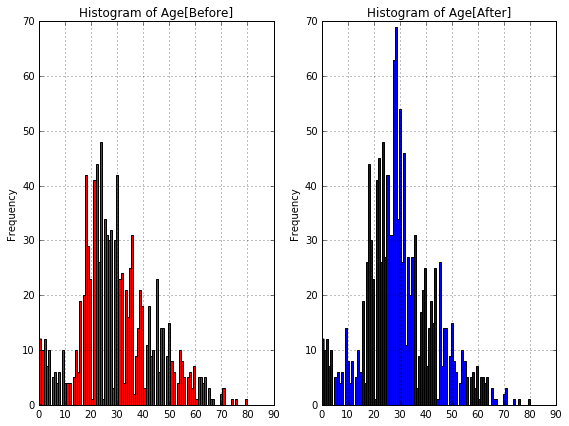

In [134]:
fg, ax = plt.subplots(ncols=2)
ax[0].set_ylim((0,70))
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Age[Before]')
full.Age.hist(bins=100, color='red', ax=ax[0])

pred = reg.predict(full[full.Age.isnull()].drop('Age', axis=1))
full.set_value(full.Age.isnull(), 'Age', pred)

ax[1].set_ylim((0,70))
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Age[After]')
full.Age.hist(bins=100, color='blue', ax=ax[1])
fg.tight_layout()

In [135]:
_ = train.set_value(train.index, 'Age', full[:891].Age.values)

In [136]:
_ = test.set_value(test.index, 'Age', full[891:].Age.values)

In [137]:
del full

## Data Manipulation

Encoding sex, feamle: 0 and male: 1

In [138]:
train.Sex = np.where(train.Sex=='female', 0, 1)
test.Sex = np.where(test.Sex=='female', 0, 1)

Convert values of Embarked into dummy variables

In [139]:
train = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age', 'Survived']]
test = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']]

In [140]:
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

## Build Model

In [170]:
X = train.drop(['Survived'], axis=1)
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(random_state=42)
parameters = {'n_estimators':[45,50,55], 'criterion': ['gini', 'entropy']}
scoring_function = make_scorer(accuracy_score, greater_is_better=True)

clf = grid_search.GridSearchCV(rfc, param_grid=parameters, scoring=scoring_function)
clf.fit(X_train, y_train)
print clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [172]:
accuracy_score(y_test, clf.best_estimator_.predict(X_test))

0.78923766816143492